<a href="https://colab.research.google.com/github/berberberk/timl-fs-2024/blob/main/TIML4_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![image.png](https://miro.medium.com/v2/resize:fit:607/1*suPyzoInkRqOJivGlfsXPA.png)

In [ ]:
# @title Импорт библиотек

import kagglehub
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score, precision_recall_curve, roc_curve, auc, precision_score, recall_score
from sklearn.decomposition import PCA


In [ ]:
# @title Загрузка датасета

path = kagglehub.dataset_download("muratkokludataset/raisin-dataset", path='Raisin_Dataset/Raisin_Dataset.xlsx')

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/muratkokludataset/raisin-dataset/versions/1/Raisin_Dataset/Raisin_Dataset.xlsx


**Column Descriptions**
* Area: The number of pixels within the boundary of the raisin.
* MajorAxisLength: The length of the longest axis that can be drawn on the * raisin.
* MinorAxisLength: The length of the shortest axis that can be drawn on the raisin.
* Eccentricity: A measure of how elongated the raisin is compared to a perfect circle.
* ConvexArea: The number of pixels of the smallest convex hull surrounding the raisin.
* Extent: The ratio of the region formed by the raisin to the total number of pixels in the bounding box.
* Perimeter: The distance around the boundary of the raisin.
* Class: The classification label indicating whether the raisin is of the Kecimen or Besni variety.

**Dataset Summary**
* Total Number of Samples: 900
* Number of Features: 7
* Classes: Kecimen, Besni
* Source: Classification of Raisin Grains Using Machine Vision and Artificial Intelligence Methods, Gazi Journal of Engineering Sciences, December 2020.

In [ ]:
df = pd.read_excel(path)
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [ ]:
# Проверка на пропущенные значения
print("\nПроверка пропущенных значений:")
print(df.isnull().sum())



Проверка пропущенных значений:
Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64


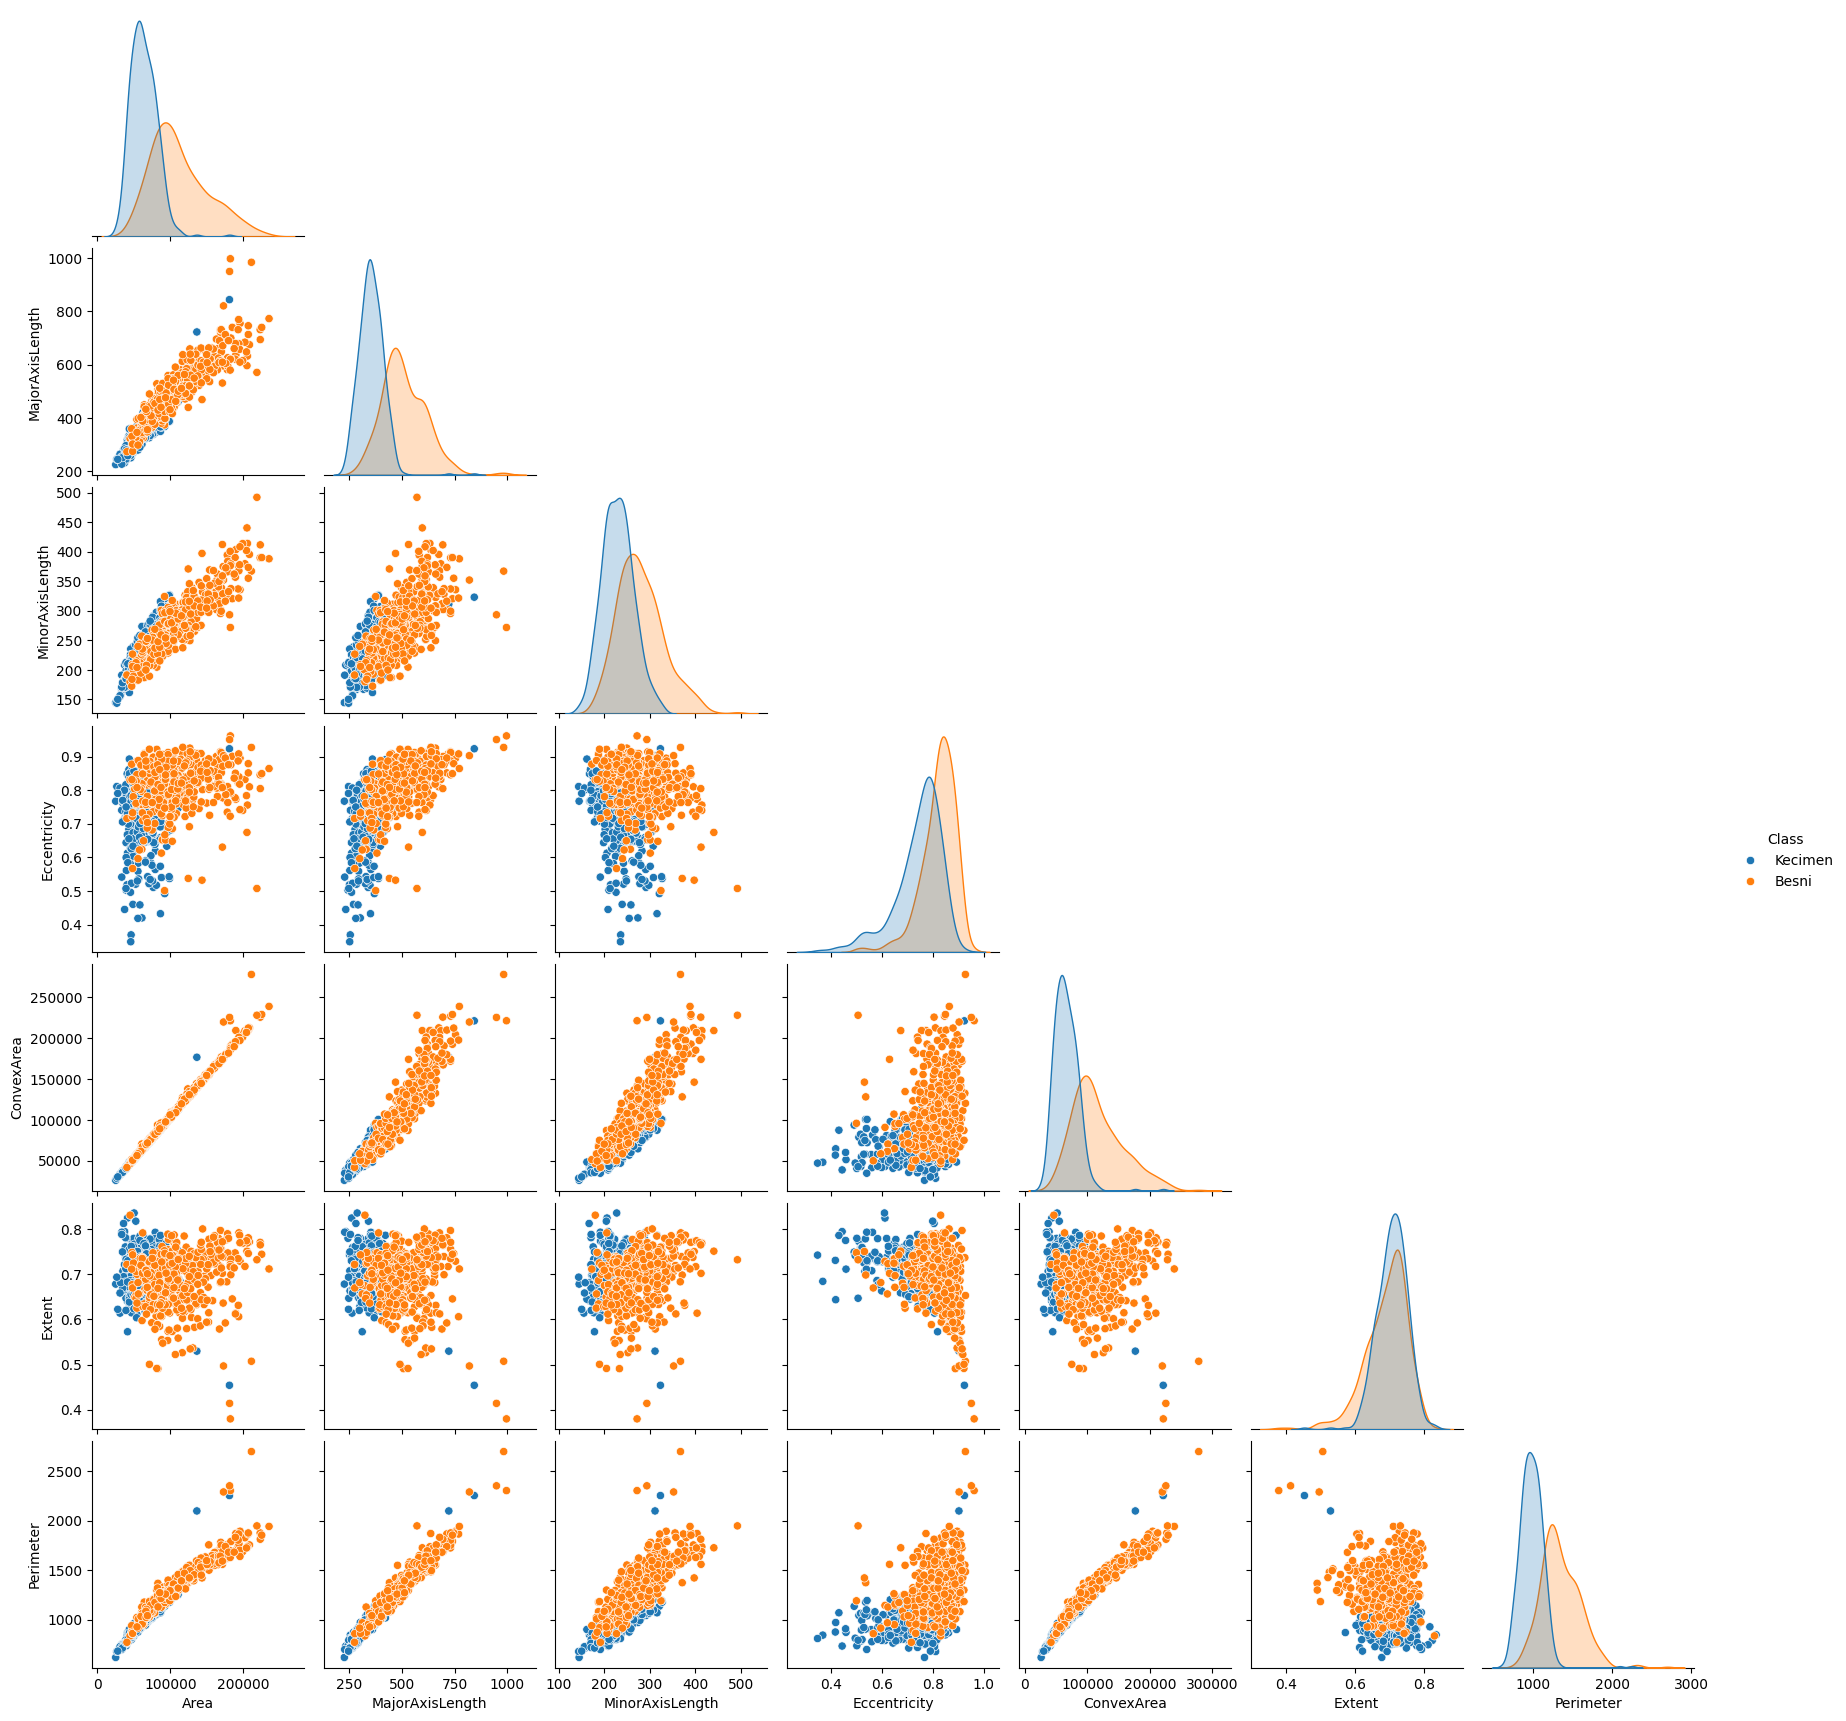

In [ ]:
sns.pairplot(df, hue='Class', corner=True, diag_kind='kde')

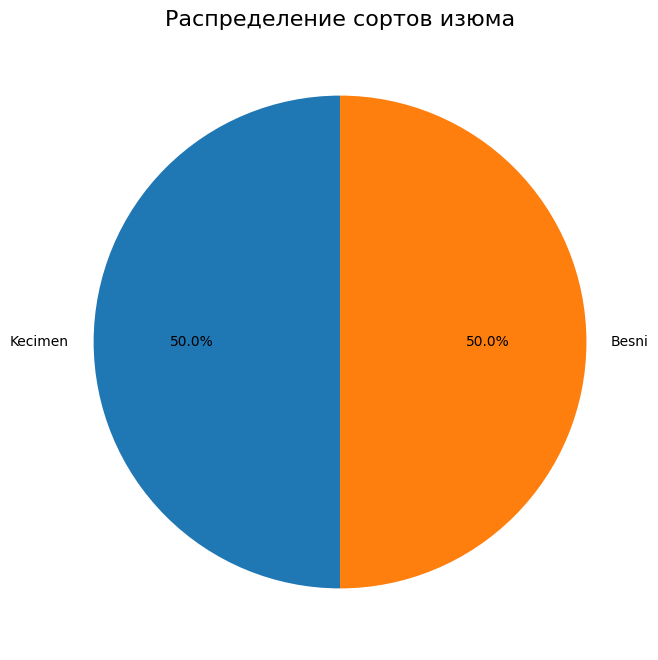

In [ ]:
plt.figure(figsize=(12, 8))
class_counts = df['Class'].value_counts()
plt.pie(class_counts,
        labels=class_counts.index,
        autopct='%1.1f%%',
        startangle=90)
plt.title('Распределение сортов изюма', fontsize=16)
plt.show()

In [ ]:
# @title Подготовка данных

X = df.drop('Class', axis=1)
y = df['Class']
X.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251


In [ ]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение данных на обучающую и тестовую выборки (70/30)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)
print("\nРазмеры выборок:")
print(f"Обучающая выборка: {X_train.shape}, Тестовая выборка: {X_test.shape}")


Размеры выборок:
Обучающая выборка: (630, 7), Тестовая выборка: (270, 7)


In [ ]:

# @title Реализация моделей классификации
# Логистическая регрессия
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
y_proba_log = log_reg.predict_proba(X_test)

print(y_pred_log[:10], y_proba_log[:10])

# K-ближайшие соседи
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_proba_knn = knn.predict_proba(X_test)

print(y_pred_knn[:10], y_proba_knn[:10])

# Метод опорных векторов
svc = SVC(probability=True)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
y_proba_svc = svc.predict_proba(X_test)

print(y_pred_svc[:10], y_proba_svc[:10])

[0 1 0 1 1 0 1 1 1 1] [[7.70001650e-01 2.29998350e-01]
 [3.90452472e-02 9.60954753e-01]
 [9.99767425e-01 2.32574997e-04]
 [1.13205713e-02 9.88679429e-01]
 [1.01666120e-01 8.98333880e-01]
 [9.14465503e-01 8.55344972e-02]
 [3.51229954e-01 6.48770046e-01]
 [2.32064360e-01 7.67935640e-01]
 [5.11798862e-02 9.48820114e-01]
 [3.02651537e-02 9.69734846e-01]]
[0 1 0 1 1 0 1 1 1 1] [[0.8 0.2]
 [0.2 0.8]
 [1.  0. ]
 [0.2 0.8]
 [0.  1. ]
 [1.  0. ]
 [0.2 0.8]
 [0.4 0.6]
 [0.  1. ]
 [0.  1. ]]
[0 1 0 1 1 0 1 1 1 1] [[0.89273943 0.10726057]
 [0.11628472 0.88371528]
 [0.91636582 0.08363418]
 [0.15671275 0.84328725]
 [0.06544057 0.93455943]
 [0.98459232 0.01540768]
 [0.23836173 0.76163827]
 [0.19266236 0.80733764]
 [0.0724487  0.9275513 ]
 [0.08435425 0.91564575]]


In [ ]:
# @title Оценка моделей

def plot_confusion_matrix(y_test, y_pred, title="Матрица ошибок"):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Kecimen", "Besni"], yticklabels=["Kecimen", "Besni"])
    plt.title(title)
    plt.xlabel("Прогноз")
    plt.ylabel("Реальность")
    plt.show()

In [ ]:
def plot_predicted_classes(X_test, y_test, y_pred, title="Predicted Classes"):
    pca = PCA(n_components=2, random_state=42)
    data_pca = pca.fit_transform(X_test)
    pd.DataFrame(data_pca).head()
    plt.figure(figsize=(8, 6))
    plt.scatter(data_pca[:, 0], data_pca[:, 1], c=(y_pred[:]))
    plt.title('Результаты классификации')
    plt.xlabel('Первая главная компонента')
    plt.ylabel('Вторая главная компонента')
    plt.show()


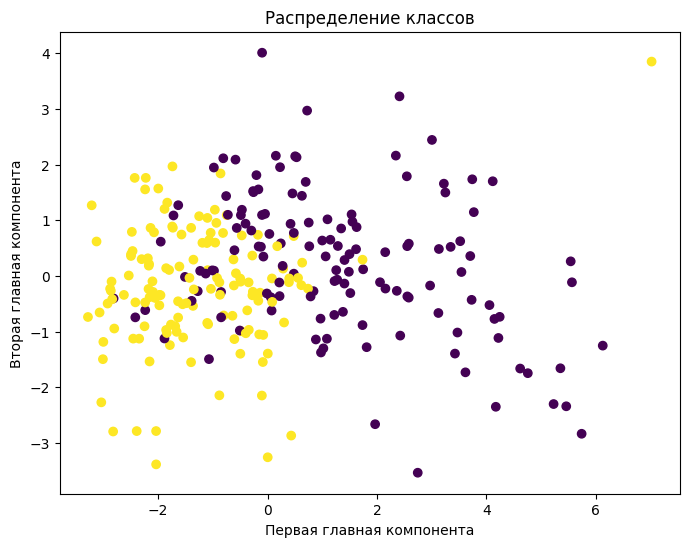

In [ ]:
pca = PCA(n_components=2, random_state=42)
data_pca = pca.fit_transform(X_test)
pd.DataFrame(data_pca).head()

plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=y_test)
plt.title('Распределение классов')
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.show()


Оценка моделей:
Логистическая регрессия:
Accuracy: 0.859
F1-Score: 0.859
ROC-AUC: 0.859


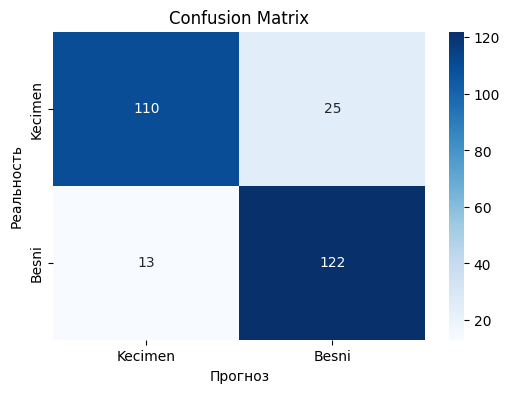

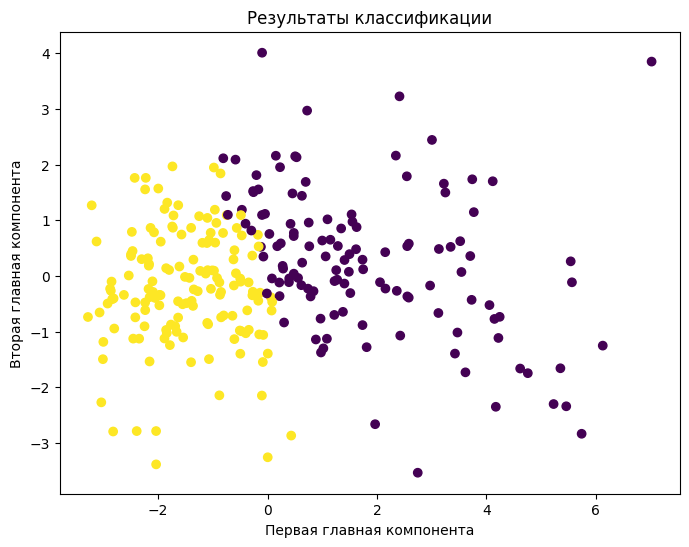

Метод K-ближайших соседей:
Accuracy: 0.826
F1-Score: 0.825
ROC-AUC: 0.826


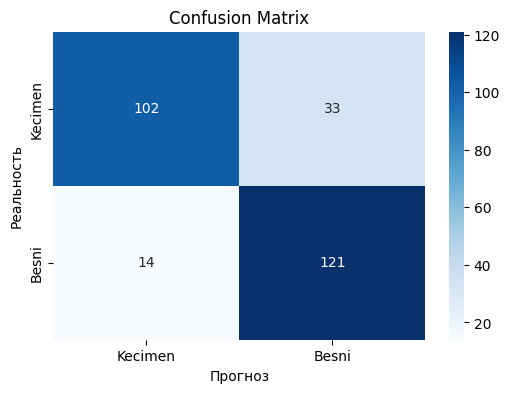

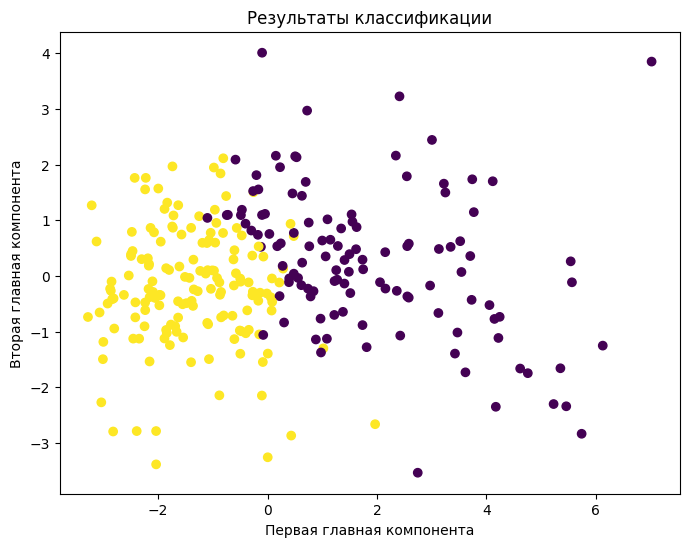

Метод опорных векторов:
Accuracy: 0.848
F1-Score: 0.847
ROC-AUC: 0.848


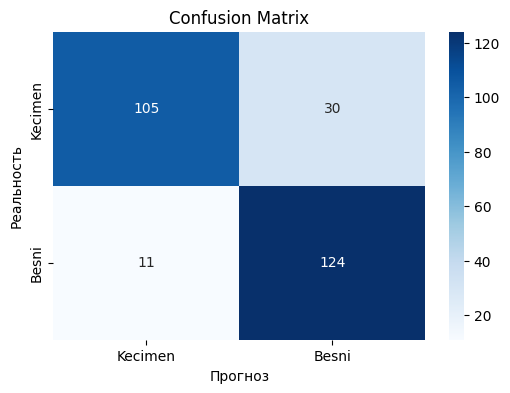

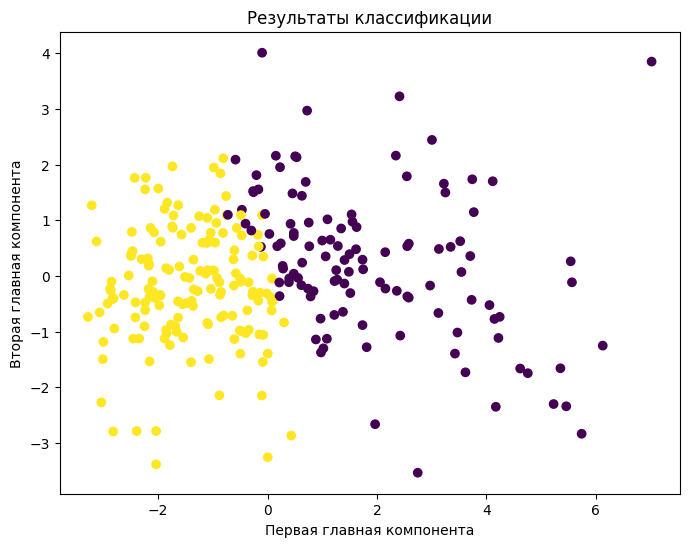

In [ ]:
def evaluate_model(name, X_test, y_test, y_pred, y_proba):
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, y_pred)
    print(f"{name}:")
    print(f"Accuracy: {acc:.3f}")
    print(f"F1-Score: {f1:.3f}")
    print(f"ROC-AUC: {roc_auc:.3f}")
    plot_confusion_matrix(y_test, y_pred)
    plot_predicted_classes(X_test, y_test, y_pred)

print("\nОценка моделей:")
evaluate_model("Логистическая регрессия", X_test, y_test, y_pred_log, y_proba_log)
evaluate_model("Метод K-ближайших соседей", X_test, y_test, y_pred_knn, y_proba_knn)
evaluate_model("Метод опорных векторов", X_test, y_test, y_pred_svc, y_proba_svc)

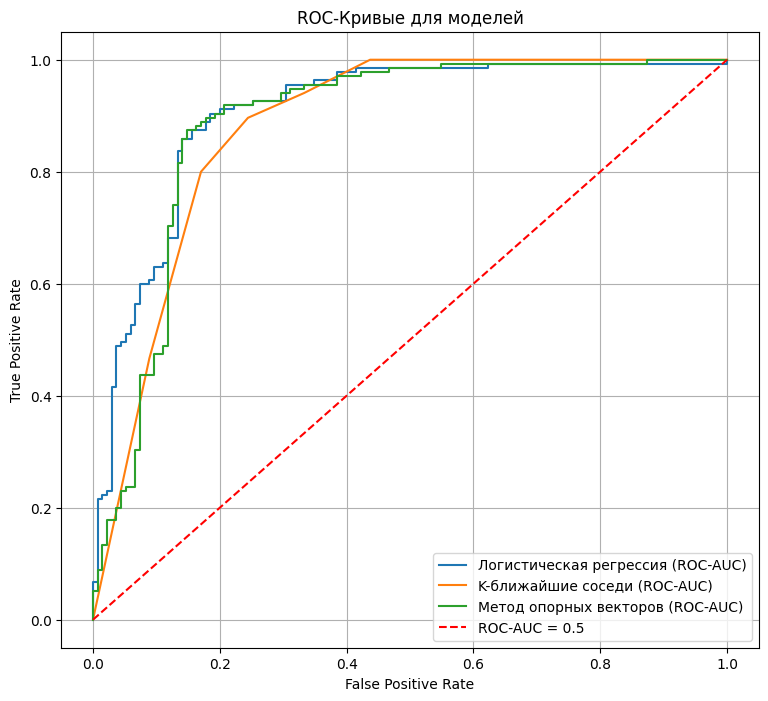

In [ ]:
# @title PR и ROC-кривые
models = {
    "Логистическая регрессия": y_proba_log,
    "K-ближайшие соседи": y_proba_knn,
    "Метод опорных векторов": y_proba_svc
}

plt.figure(figsize=(9, 8))
for name, y_proba in models.items():
    precision, recall, _ = precision_recall_curve(y_test, y_proba[:, 1], pos_label=1)
    fpr, tpr, _ = roc_curve(y_test, y_proba[:, 1], pos_label=1)
    plt.plot(fpr, tpr, label=f"{name} (ROC-AUC)")
plt.plot(fpr, fpr, c='r', linestyle='--', label=f"ROC-AUC = 0.5")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-Кривые для моделей")
plt.legend()
plt.grid(True)
plt.show()

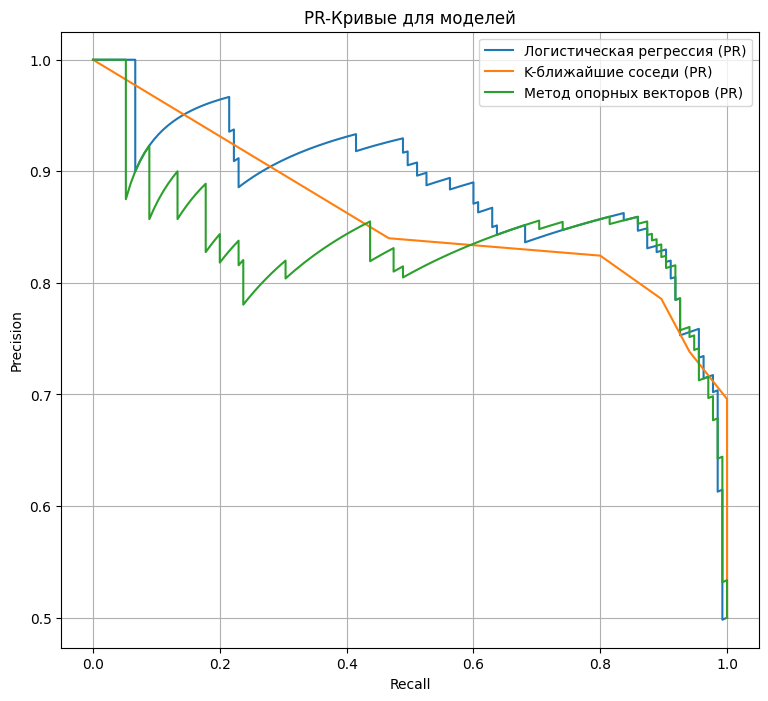

In [ ]:
models = {
    "Логистическая регрессия": y_proba_log,
    "K-ближайшие соседи": y_proba_knn,
    "Метод опорных векторов": y_proba_svc
}

plt.figure(figsize=(9, 8))
for name, y_proba in models.items():
    precision, recall, _ = precision_recall_curve(y_test, y_proba[:, 1], pos_label=1)
    plt.plot(recall, precision, label=f"{name} (PR)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PR-Кривые для моделей")
plt.legend()
plt.grid(True)
plt.show()

Оптимальный порог для Логистическая регрессия по G-mean: 0.581 с G-mean = 0.859


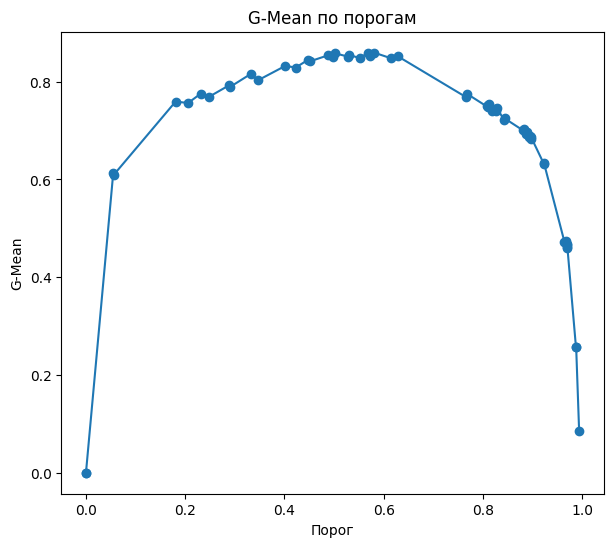

Оптимальный порог для K-ближайшие соседи по G-mean: 0.600 с G-mean = 0.823


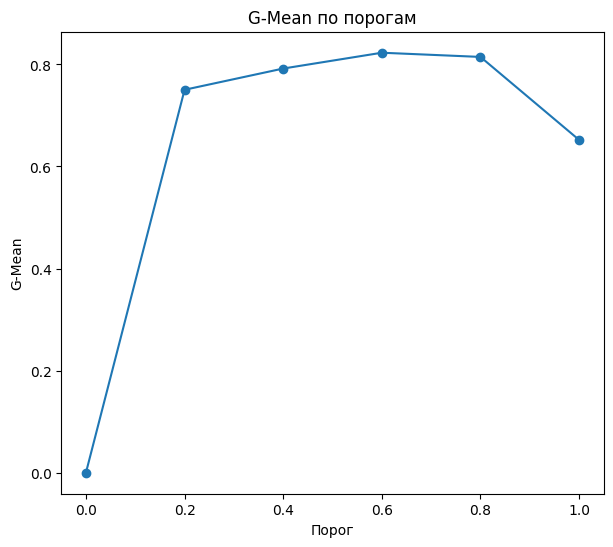

Оптимальный порог для Метод опорных векторов по G-mean: 0.657 с G-mean = 0.863


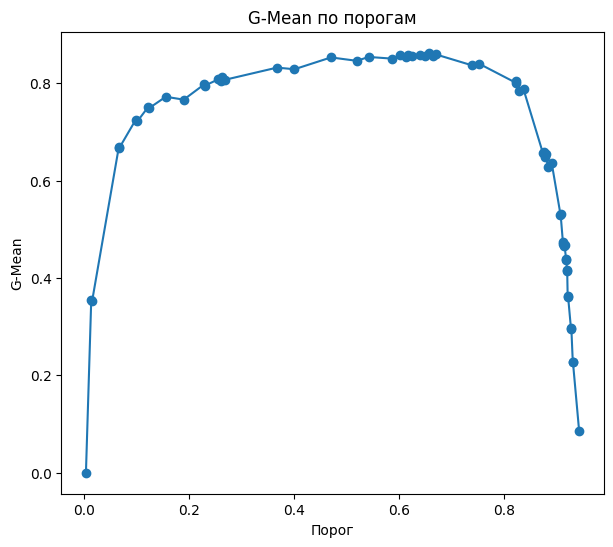

In [ ]:
# @title Оптимизация порога классификации
# Найдем оптимальный порог по G-mean
if len(np.unique(y)) == 2:  # Проверка на бинарную задачу
    def gmean_score(recall, specificity):
        return np.sqrt(recall * specificity)

    models = {
    "Логистическая регрессия": y_proba_log,
    "K-ближайшие соседи": y_proba_knn,
    "Метод опорных векторов": y_proba_svc
    }

    for name, y_proba in models.items():
        plt.figure(figsize=(7, 6))
        fpr, tpr, thresholds = roc_curve(y_test, y_proba[:, 1])
        gmeans = [gmean_score(tpr[i], 1 - fpr[i]) for i in range(len(fpr))]
        ix = np.argmax(gmeans)
        print(f"Оптимальный порог для {name} по G-mean: {thresholds[ix]:.3f} с G-mean = {gmeans[ix]:.3f}")

        plt.plot(thresholds, gmeans, marker='o')
        plt.title("G-Mean по порогам")
        plt.xlabel("Порог")
        plt.ylabel("G-Mean")
        plt.show()